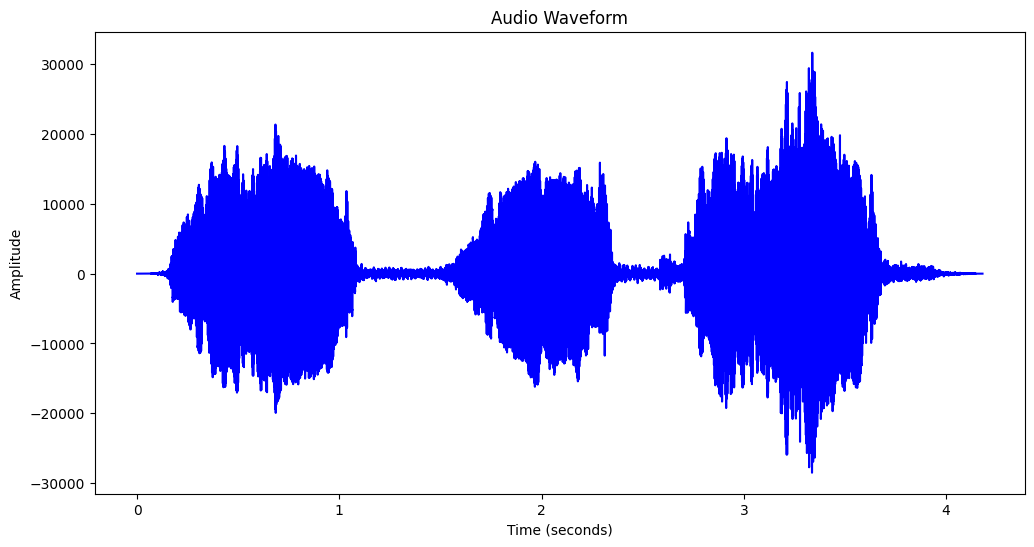

In [1]:
import wave
import struct
import matplotlib.pyplot as plt

# Open the wave file
wavefile = wave.open('./Cooing-bird-sound-effect.wav', 'r')

# Get parameters
num_frames = wavefile.getnframes()
num_channels = wavefile.getnchannels()
sample_width = wavefile.getsampwidth()
frame_rate = wavefile.getframerate()

# Determine the format for struct.unpack based on sample width
if sample_width == 1:
    fmt = "<B"  # 8-bit audio, unsigned
elif sample_width == 2:
    fmt = "<h"  # 16-bit audio, signed
elif sample_width == 4:
    fmt = "<i"  # 32-bit audio, signed
else:
    raise ValueError("Unsupported sample width")

# Read all frames and convert them to amplitude values
amplitudes = []
for i in range(num_frames):
    frame_data = wavefile.readframes(1)
    if len(frame_data) == sample_width * num_channels:
        # Unpack the frame data and append to the amplitudes list
        frame_samples = struct.unpack(fmt, frame_data[:sample_width])
        amplitudes.append(frame_samples[0])

# Close the file
wavefile.close()

# Create a time axis in seconds
time_axis = [i / frame_rate for i in range(num_frames)]

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(time_axis, amplitudes, color='blue')
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()
